In [45]:
# plot log file

#!/usr/bin/env python
# coding: utf-8

import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

# car_path = r"D:\Z_DesayWorkSpace\8303_parallel_error\8303_20220517\4_pc_1/"
car_path = r"D:\Z_DesayWorkSpace\8303_parallel_error\8303_20220517\yw_pc_test/"


log_car_file = car_path+"logfile_all.txt"
path_car_file = car_path+"computed_path.txt"

print("log_car_file: ", log_car_file)
print("path_car_file: ", path_car_file)

log_car_file:  D:\Z_DesayWorkSpace\8303_parallel_error\8303_20220517\yw_pc_test/logfile_all.txt
path_car_file:  D:\Z_DesayWorkSpace\8303_parallel_error\8303_20220517\yw_pc_test/computed_path.txt


In [46]:
# parse log_car_file

# parse log file:

pose_start_x = []
pose_start_y = []
pose_start_theta = []

pose_goal_x = []
pose_goal_y = []
pose_goal_theta = []

m_lane_width = 0.0
m_iterations = 0.0

m_slot_length = 0.0
m_slot_width = 0.0

forward_mid_x = []
forward_mid_y = []
forward_mid_theta = []

reverse_mid_x = []
reverse_mid_y = []
reverse_mid_theta = []


slot_center_x = []
slot_center_y = []
slot_center_theta = []


slot_center_apa_x = []
slot_center_apa_y = []
slot_center_apa_theta = []


try:

    with (open(log_car_file,"r")) as f:
        print("in log file\n")
        
        
        computePath_start = True
        computePath_goal = True
        right_side = False
        
        
        for line in f:
           
            ##########################################################################################
            ########## for shared parking ParkingMiddleGoals
            
            # 1. get goal pose
            if ("ParkingMiddleGoals: received goal from sharedstate" in line):
                print("1. ParkingMiddleGoals: received goal from sharedstate -- ok")
#                 raw = line.split()
#                 print(raw)
                raw_x = line.split()[8]
                raw_y = line.split()[9]
                raw_theta = line.split()[10]
                pose_goal_x.append(float(raw_x))
                pose_goal_y.append(float(raw_y))
                pose_goal_theta.append(float(raw_theta))
                print("1. ** target pose saved")

            # 2. left or right side parking
            elif ("right side parking" in line):
                print("2. right side parking -- ok")
                right_side = True
                
            # 3. get m_iterations
            elif ("iteration loop level 1: m_iterations" in line):
#                 print("3. ParkingMiddleGoals: m_flow_util->m_iterations -- ok")
                raw = line.split()
#                 print(raw)
                raw_single_value = line.split()[8]
                m_iterations = raw_single_value                
  
            
            # 4. get m_lane_width
            elif ("ParkingMiddleGoals: m_lane_width" in line):
                print("4. ParkingMiddleGoals: m_lane_widths -- ok")
                raw = line.split()
                print(raw)
                raw_single_value = line.split()[5]
                m_lane_width = raw_single_value

                
            # 10. estimated parking spot center (parking_center = true_goal + offest * angle)
            elif ("ParkingMiddleGoals: convert goal to estimated parking spot center" in line):
                print ("10. ParkingMiddleGoals: convert goal to estimated parking spot center -- ok")
                print(line.split())
                raw_x = line.split()[11]
                raw_y = line.split()[12]
                raw_theta = line.split()[13]
                slot_center_x.append(float(raw_x))
                slot_center_y.append(float(raw_y))
                slot_center_theta.append(float(raw_theta))
                print("slot_center_x: ", slot_center_x)
                print("slot_center_y: ", slot_center_y)
                print("slot_center_theta: ", slot_center_theta)
                print("10. ** slot center saved")
            
            
            # 11. parking spot center from APA
            elif ("ParkingMiddleGoals: parking spot center from APA" in line):
                print ("11. ParkingMiddleGoals: parking spot center from APA -- ok")
                print(line.split())
                raw_x = line.split()[11]
                raw_y = line.split()[12]
                raw_theta = line.split()[13]
                slot_center_apa_x.append(float(raw_x))
                slot_center_apa_y.append(float(raw_y))
                slot_center_apa_theta.append(float(raw_theta))
                print("11. ** slot center apa saved")
                
            # 12. parking slot dimensions
            elif ("ParkingMiddleGoals: parking spot length" in line):
                print("12. ParkingMiddleGoals: parking spot length -- ok")
                print(line.split())
                raw_l = line.split()[7]
                raw_w = line.split()[9]
                raw_lw = line.split()[11]
                m_slot_length = float(raw_l)
                m_slot_width = float(raw_w)
                m_lane_width = float(raw_lw)
                print("m_slot_length: ", m_slot_length)
                print("m_slot_width: ", m_slot_width)
                print("m_lane_width: ", m_lane_width)
                print("12. ** slot dimensions saved")
            
            
            ##########################################################################################
            ########### for perpendicular parking                
                
            # 2. get start pose
            elif ("getPerpendicularPath: car_pose" in line):
                print("2. getPerpendicularPath: car_pose -- ok")
#                 raw = line.split()
#                 print(raw)
                raw_x = line.split()[5]
                raw_y = line.split()[6]
                raw_theta = line.split()[7]
                pose_start_x.append(float(raw_x))
                pose_start_y.append(float(raw_y))
                pose_start_theta.append(float(raw_theta))
                print("2. ** perpendicular car_pose saved")
            
                
            # 5. forward mid point
            elif ("getPerpendicularPath: forward mid point" in line):
                print("5. getPerpendicularPath: forward mid point -- ok")
                raw = line.split()
                print(raw)
                raw_x = line.split()[8]
                raw_y = line.split()[9]
                raw_theta = line.split()[10]
                forward_mid_x.append(float(raw_x))
                forward_mid_y.append(float(raw_y))
                forward_mid_theta.append(float(raw_theta))

            
            # 6. reverse mid point
            elif ("getPerpendicularPath: reverse mid point" in line):
                print("6. getPerpendicularPath: reverse mid point -- ok")
                raw = line.split()
                print(raw)
                raw_x = line.split()[8]
                raw_y = line.split()[9]
                raw_theta = line.split()[10]
                reverse_mid_x.append(float(raw_x))
                reverse_mid_y.append(float(raw_y))
                reverse_mid_theta.append(float(raw_theta))

            
            
            ##########################################################################################
            ########### for parallel parking
            
            # 7. get start pose
            elif ("getParallelPath: car_pose" in line):
                print("7. getParallelPath: car_pose -- ok")
#                 raw = line.split()
#                 print(raw)
                raw_x = line.split()[5]
                raw_y = line.split()[6]
                raw_theta = line.split()[7]
                pose_start_x.append(float(raw_x))
                pose_start_y.append(float(raw_y))
                pose_start_theta.append(float(raw_theta))
                print("7. ** parallel car_pose saved")
                
            # 8. forward mid point
            elif ("getParallelPath: forward mid point" in line):
                print("8. getParallelPath: forward mid point -- ok")
                raw = line.split()
#                 print(raw)
                raw_x = line.split()[7]
                raw_y = line.split()[8]
                raw_theta = line.split()[9]
                forward_mid_x.append(float(raw_x))
                forward_mid_y.append(float(raw_y))
                forward_mid_theta.append(float(raw_theta))
                
            # 9. reverse mid point
            elif ("getParallelPath: reverse mid point" in line):
                print("9. getParallelPath: reverse mid point -- ok")
                raw = line.split()
#                 print(raw)
                raw_x = line.split()[7]
                raw_y = line.split()[8]
                raw_theta = line.split()[9]
                reverse_mid_x.append(float(raw_x))
                reverse_mid_y.append(float(raw_y))
                reverse_mid_theta.append(float(raw_theta))


            ##########################################################################################
            ########## for shared parking ComputePath
            
            # 10. ComputePath start pose
            elif ("Start pose: x:" in line):
                if computePath_start:
                    computePath_start = False
                    print("10. Start pose: x: -- ok")
                    print(line.split())
                    raw_x = line.split()[6].split(",")[0]
                    print(raw_x)
                    raw_y = line.split()[8].split(",")[0]
                    print(raw_y)
                    raw_theta = line.split()[10].split(",")[0]
                    print(raw_theta)
                    pose_start_x.append(float(raw_x))
                    pose_start_y.append(float(raw_y))
                    pose_start_theta.append(float(raw_theta))


            # 11. ComputePath goal pose
            elif ("Goal set: x:" in line):
                if computePath_goal:
                    computePath_goal = False
                    print("11. Goal set: x: -- ok")
                    print(line.split())
                    raw_x = line.split()[6].split(",")[0]
                    print(raw_x)
                    raw_y = line.split()[8].split(",")[0]
                    print(raw_y)
                    raw_theta = line.split()[10].split(",")[0]
                    print(raw_theta)
                    pose_goal_x.append(float(raw_x))
                    pose_goal_y.append(float(raw_y))
                    pose_goal_theta.append(float(raw_theta))

           
                

except:
    print("Unexpected error:", sys.exc_info()[0])
#     raise

in log file

1. ParkingMiddleGoals: received goal from sharedstate -- ok
1. ** target pose saved
10. ParkingMiddleGoals: convert goal to estimated parking spot center -- ok
['[2022-05-17', '02:30:46.585]', '[info]', 'ParkingMiddleGoals:', 'convert', 'goal', 'to', 'estimated', 'parking', 'spot', 'center', '9.30690', '-4.19126', '1.55814']
slot_center_x:  [9.3069]
slot_center_y:  [-4.19126]
slot_center_theta:  [1.55814]
10. ** slot center saved
12. ParkingMiddleGoals: parking spot length -- ok
['[2022-05-17', '02:30:46.585]', '[info]', 'ParkingMiddleGoals:', 'parking', 'spot', 'length', '4.84185', 'width', '2.38582', 'lane_width', '4.0', 'mode', '5']
m_slot_length:  4.84185
m_slot_width:  2.38582
m_lane_width:  4.0
12. ** slot dimensions saved
2. getPerpendicularPath: car_pose -- ok
2. ** perpendicular car_pose saved
2. right side parking -- ok
5. getPerpendicularPath: forward mid point -- ok
['[2022-05-17', '02:30:46.585]', '[info]', 'getPerpendicularPath:', 'forward', 'mid', 'point', '

In [51]:
###############################################################################################
#################### calculate parking slot points using slot_center or slot_center_apa

import numpy as np
from math import sqrt, cos, sin, radians, atan2, degrees

def cc2wc_transform(point_list_cc_x, point_list_cc_y, point_list_wc_x, point_list_wc_y, tr_theta, tr_x, tr_y):
    """ affine transformation matrix
    transform points in cc frame to wc frame using rotation & translation matrix T_R
    """
    point_list_cc = []
    point_list_wc = []
    
    for i in range(len(point_list_cc_x)):
        x = point_list_cc_x[i]
        y = point_list_cc_y[i]
        z = 1
        print("x cc:\t", x)
        print("y cc:\t", y)
        tmp_path_point = np.array([
            [x],
            [y],
            [1],
        ])
        point_list_cc.append(tmp_path_point)
        
    print("tr_theta: ", tr_theta)
    
    T_R = np.array([
        [cos(tr_theta), -sin(tr_theta), tr_x],
        [sin(tr_theta), cos(tr_theta), tr_y],
        [0, 0, 1],
    ])
    
    for i in range(len(point_list_cc_x)):
        tmp_point_wc = T_R.dot(point_list_cc[i])
        point_list_wc.append(tmp_point_wc)
        tmp_x_wc = tmp_point_wc[0][0]
        tmp_y_wc = tmp_point_wc[1][0]
        point_list_wc_x.append(tmp_x_wc)
        point_list_wc_y.append(tmp_y_wc)
    
try:
#     slot_point_x_cc = [1.25,     1.25,    -1.25,   -1.25]  # slot_width
#     slot_point_y_cc = [-2.275, 2.275, 2.275, -2.275]  # slot_length
#     slot_point_x_wc = []
#     slot_point_y_wc = []

    print("** 1")
    
    m_half_width = float(m_slot_width/2)
    m_half_length = float(m_slot_length/2)
    print("m_half_width: ", m_half_width)
    print("m_half_length: ", m_half_length)
    slot_point_x_cc = [m_half_width, m_half_width, -m_half_width, -m_half_width, m_half_width]
    slot_point_y_cc = [-m_half_length, m_half_length, m_half_length, -m_half_length, -m_half_length]
    print("slot_point_x_cc: ", slot_point_x_cc)
    print("slot_point_y_cc: ", slot_point_y_cc)
    
    print("** 2")
    
    slot_point_x_wc = []
    slot_point_y_wc = []
    print("slot_point_x_wc: ", slot_point_x_wc)
    print("slot_point_y_wc: ", slot_point_y_wc)
    
    tr_x = slot_center_x[0]
    tr_y = slot_center_y[0]
#     tr_theta = slot_center_theta[0] - (-1.570796)  # theta_cc 旋转到 theta_wc，做减法
    tr_theta =  1.570796 - slot_center_theta[0]  # theta_cc 旋转到 theta_wc，做减法
#     tr_theta = slot_center_theta[0]
    cc2wc_transform(slot_point_x_cc, slot_point_y_cc, 
                    slot_point_x_wc, slot_point_y_wc,
                   tr_theta, tr_x, tr_y)
    print("slot points x:\t", slot_point_x_wc)
    print("slot points y:\t", slot_point_y_wc)
except:
    print("Unexpected error:", sys.exc_info()[0])

# 7. plot parking slot
# plt.plot(slot_point_x_wc, slot_point_y_wc)
# plt.plot(slot_point_x_cc, slot_point_y_cc)


** 1
m_half_width:  1.19291
m_half_length:  2.420925
slot_point_x_cc:  [1.19291, 1.19291, -1.19291, -1.19291, 1.19291]
slot_point_y_cc:  [-2.420925, 2.420925, 2.420925, -2.420925, -2.420925]
** 2
slot_point_x_wc:  []
slot_point_y_wc:  []
x cc:	 1.19291
y cc:	 -2.420925
x cc:	 1.19291
y cc:	 2.420925
x cc:	 -1.19291
y cc:	 2.420925
x cc:	 -1.19291
y cc:	 -2.420925
x cc:	 1.19291
y cc:	 -2.420925
tr_theta:  0.012656
slot points x:	 [10.530352873361876, 10.469076055621377, 8.083447126638125, 8.144723944378624, 10.530352873361876]
slot points y:	 [-6.5968940516353625, -1.7554318165138705, -1.785625948364637, -6.627088183486129, -6.5968940516353625]


pose start [x, y, theta]:	 [8.759] [-0.026] [-0.003491]
pose goal [x, y, theta]:	 [9.28589] [-5.85113] [1.55814]
goal to start: dx :	 0.5268899999999999
goal to start: dy :	 -5.825130000000001


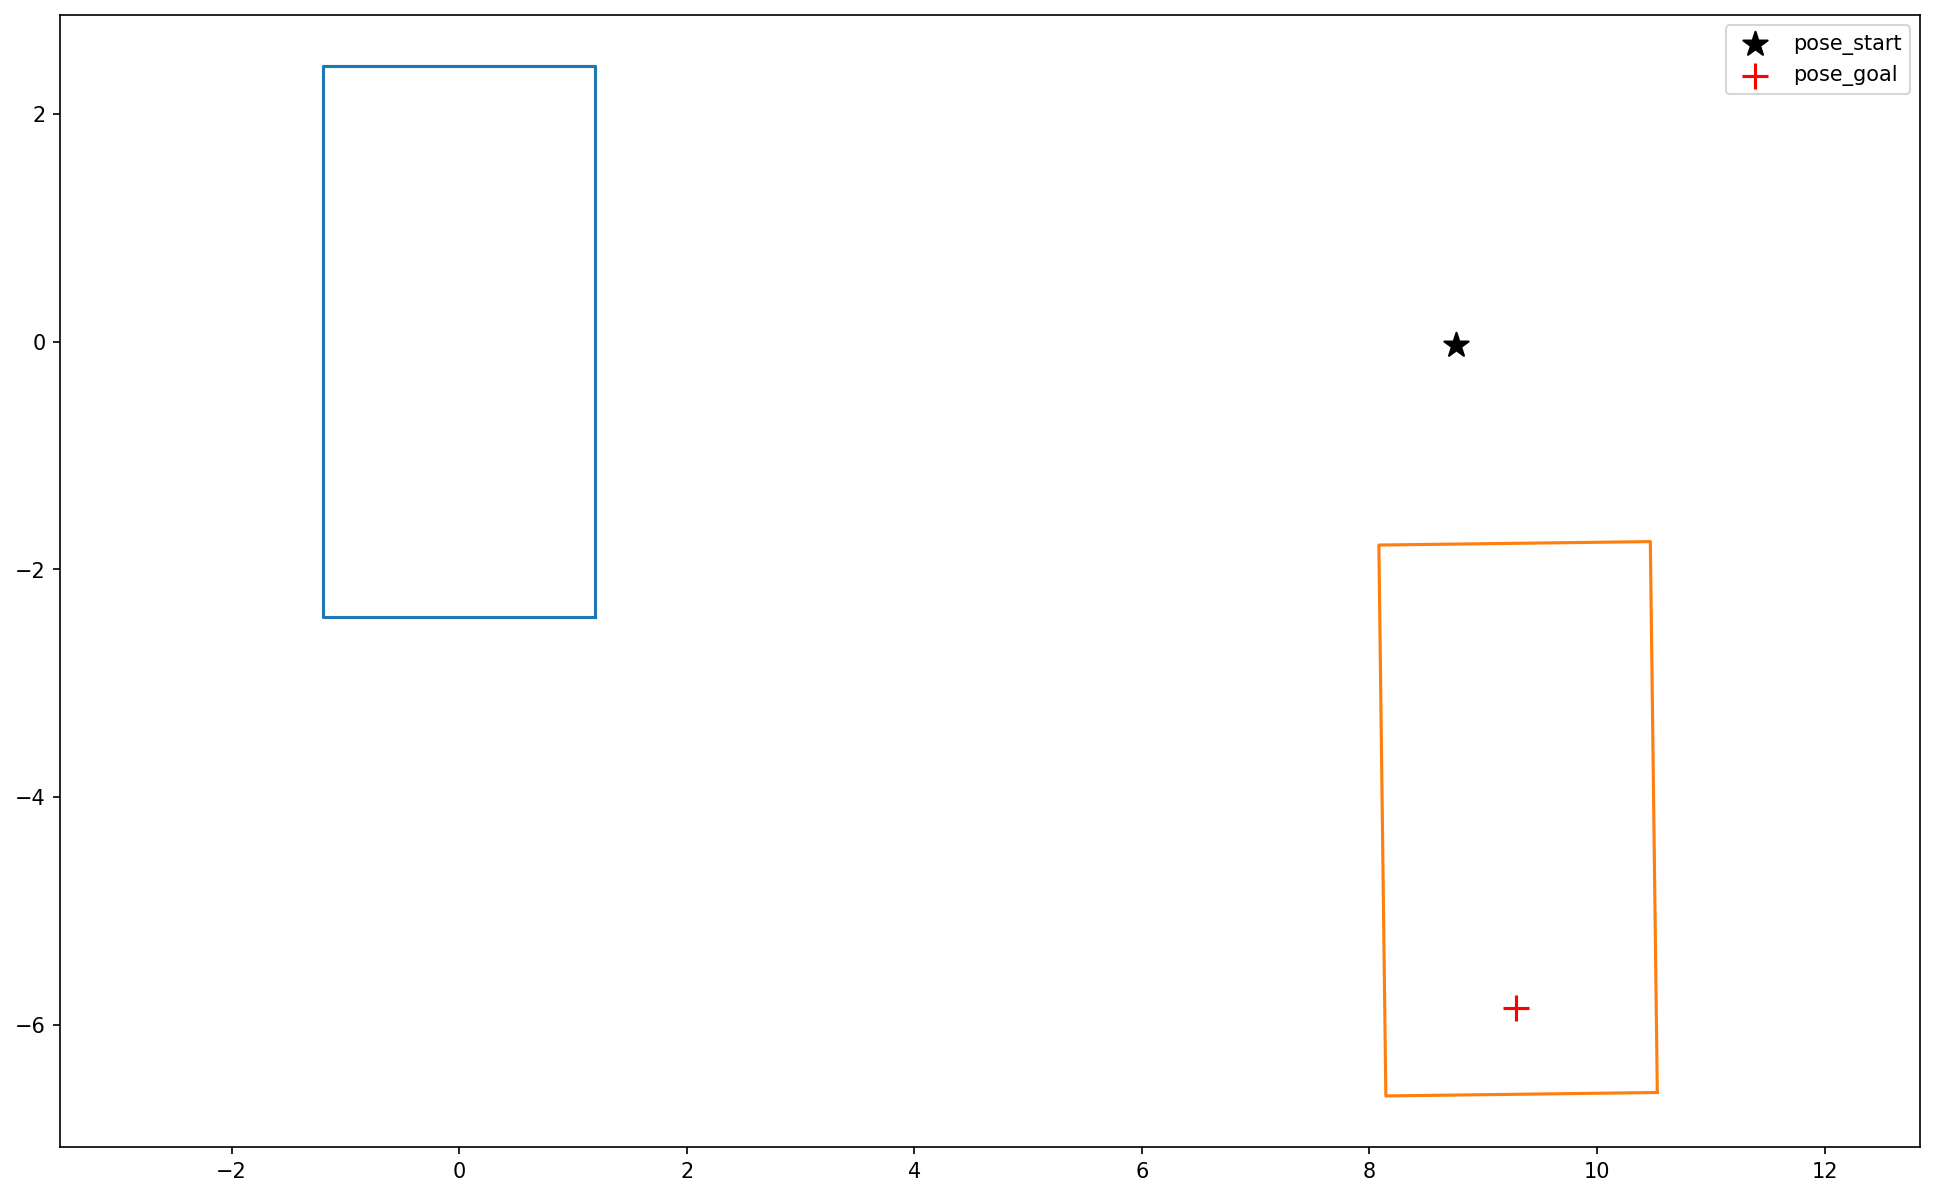

In [52]:
# test, plot start, goal, slot


plt.figure(figsize=(16, 10), dpi=150) # parallel
# plt.figure(figsize=(10,10), dpi=150) # perpendicular

plt.axis("equal")

# 2. plot start
plt.scatter(pose_start_x, pose_start_y, label="pose_start", marker='*', color='k', s=150)
print("pose start [x, y, theta]:\t", pose_start_x, pose_start_y, pose_start_theta)

# 3. plot goal
try:
    plt.scatter(pose_goal_x, pose_goal_y, label="pose_goal", marker='+', color='r', s=150)
    print("pose goal [x, y, theta]:\t", pose_goal_x, pose_goal_y, pose_goal_theta)
    print("goal to start: dx :\t", pose_goal_x[0] - pose_start_x[0])
    print("goal to start: dy :\t", pose_goal_y[0] - pose_start_y[0])
except:
    print("Unexpected error:", sys.exc_info()[0])


# plot slot cc
plt.plot(slot_point_x_cc, slot_point_y_cc)

    
# plot slot wc
plt.plot(slot_point_x_wc, slot_point_y_wc)


plt.legend(loc="best")

plt.show()

In [53]:
# parse path file: parkingMiddleGoalsDemo_reg.txt

# load computed path files
try:
    path_carx = []
    path_cary = []

    with (open(path_car_file,"r")) as f:
        for line in f:
            if ("x y" not in line):
                path_carx.append(float(line.split()[0]))
                path_cary.append(float(line.split()[1]))
except:
    print("Unexpected error:", sys.exc_info()[0])

pose start [x, y, theta]:	 [8.759] [-0.026] [-0.003491]
pose goal [x, y, theta]:	 [9.28589] [-5.85113] [1.55814]
goal to start: dx :	 0.5268899999999999
goal to start: dy :	 -5.825130000000001


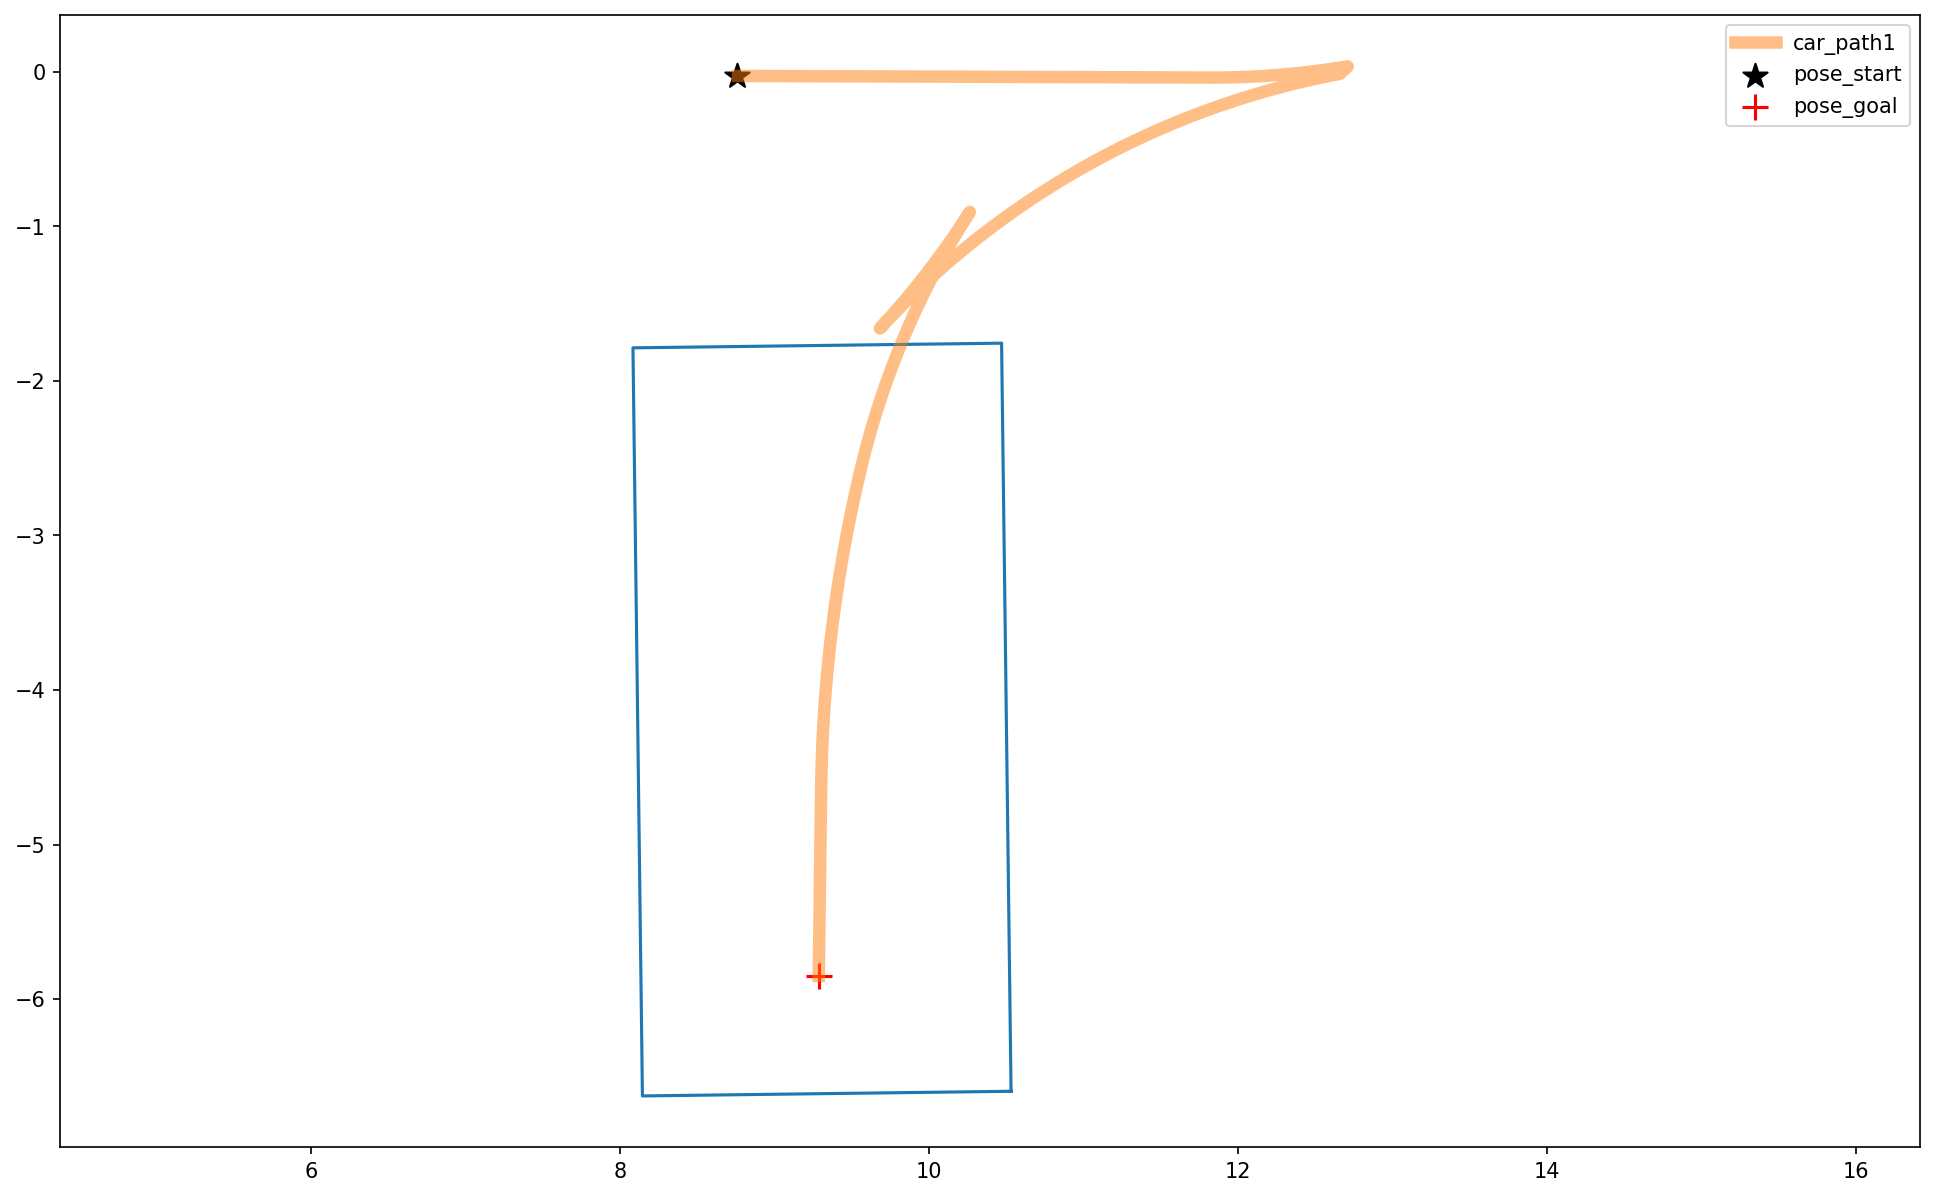

In [54]:
# test, plot start, goal, slot


plt.figure(figsize=(16, 10), dpi=150) # parallel
# plt.figure(figsize=(10,10), dpi=150) # perpendicular

plt.axis("equal")

# 2. plot start
plt.scatter(pose_start_x, pose_start_y, label="pose_start", marker='*', color='k', s=150)
print("pose start [x, y, theta]:\t", pose_start_x, pose_start_y, pose_start_theta)

# 3. plot goal
try:
    plt.scatter(pose_goal_x, pose_goal_y, label="pose_goal", marker='+', color='r', s=150)
    print("pose goal [x, y, theta]:\t", pose_goal_x, pose_goal_y, pose_goal_theta)
    print("goal to start: dx :\t", pose_goal_x[0] - pose_start_x[0])
    print("goal to start: dy :\t", pose_goal_y[0] - pose_start_y[0])
except:
    print("Unexpected error:", sys.exc_info()[0])


# 4. plot slot cc
# plt.plot(slot_point_x_cc, slot_point_y_cc)

    
# 5. plot slot wc
plt.plot(slot_point_x_wc, slot_point_y_wc)

# 6. plot computed_path
plt.plot(path_carx, path_cary, label="car_path1", linewidth=6, alpha=0.5)


plt.legend(loc="best")

plt.show()